<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings('ignore')

Leemos los datos a trabajar


In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/series.csv'
data = pd.read_csv(url)

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.index = data['date']
del data['date']

In [ ]:
data=data.asfreq('d')
data.head()

,x1,x2,x3,x4,x5,x6
date,,,,,,
2021-11-28,0.342683,0.314053,-1.252540,-1.132005,0.167948,-1.695945
2021-11-29,0.116514,-0.308586,-0.467313,-1.219225,0.578596,1.053678
2021-11-30,2.022962,-0.622566,-0.661624,-0.315990,0.190004,-0.694621
2021-12-01,2.688268,0.409142,0.326447,-0.816178,0.043774,0.969021
2021-12-02,1.957165,0.889654,0.936160,-0.608075,2.027328,0.681321


In [ ]:
data.drop('x1', inplace=True, axis=1)
data.drop('x2', inplace=True, axis=1)
data.drop('x4', inplace=True, axis=1)
data.drop('x5', inplace=True, axis=1)
data.drop('x6', inplace=True, axis=1)

In [ ]:
data.rename({'x3': 'analisis'}, axis=1,inplace=True)

In [ ]:
result = type(data)
print(result)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.describe()

,analisis
count,200.000000
mean,-0.056402
std,1.130699
min,-3.087717
25%,-0.782633
50%,-0.196231
75%,0.732845
max,3.132708


Text(0.5, 1.0, 'Histograma de la Serie')

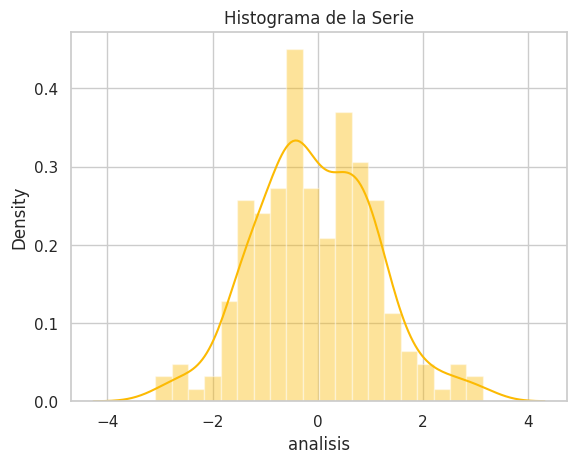

In [ ]:
sns.distplot(data.analisis,bins=20,color='#fcba03')
plt.title('Histograma de la Serie')

In [ ]:
import scipy.stats
import pylab

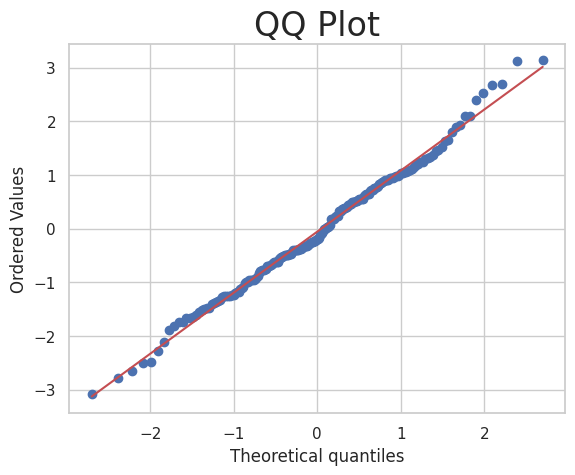

In [ ]:
scipy.stats.probplot(data.analisis, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

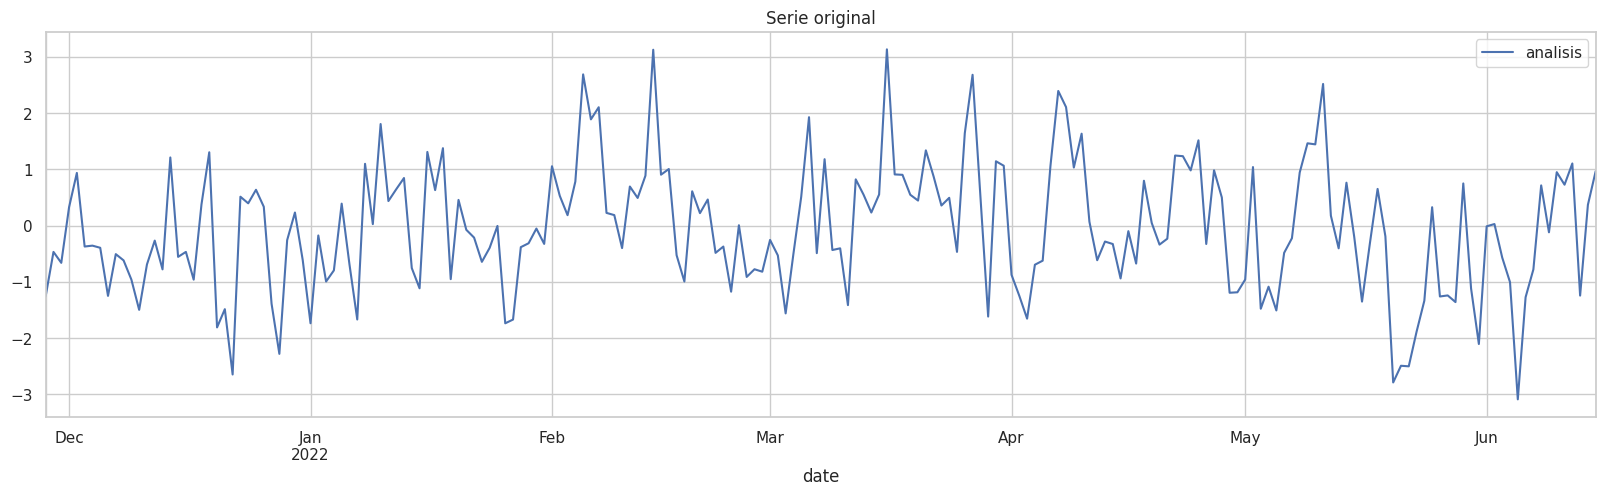

In [ ]:
data.plot(figsize=(20,5), title = "Serie original")
plt.show()

In [ ]:
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)
data_diff.drop(['2021-11-28	'], inplace=True)

In [ ]:
data_diff.head()

,analisis
date,
2021-11-29,0.785227
2021-11-30,-0.194312
2021-12-01,0.988072
2021-12-02,0.609713
2021-12-03,-1.307880


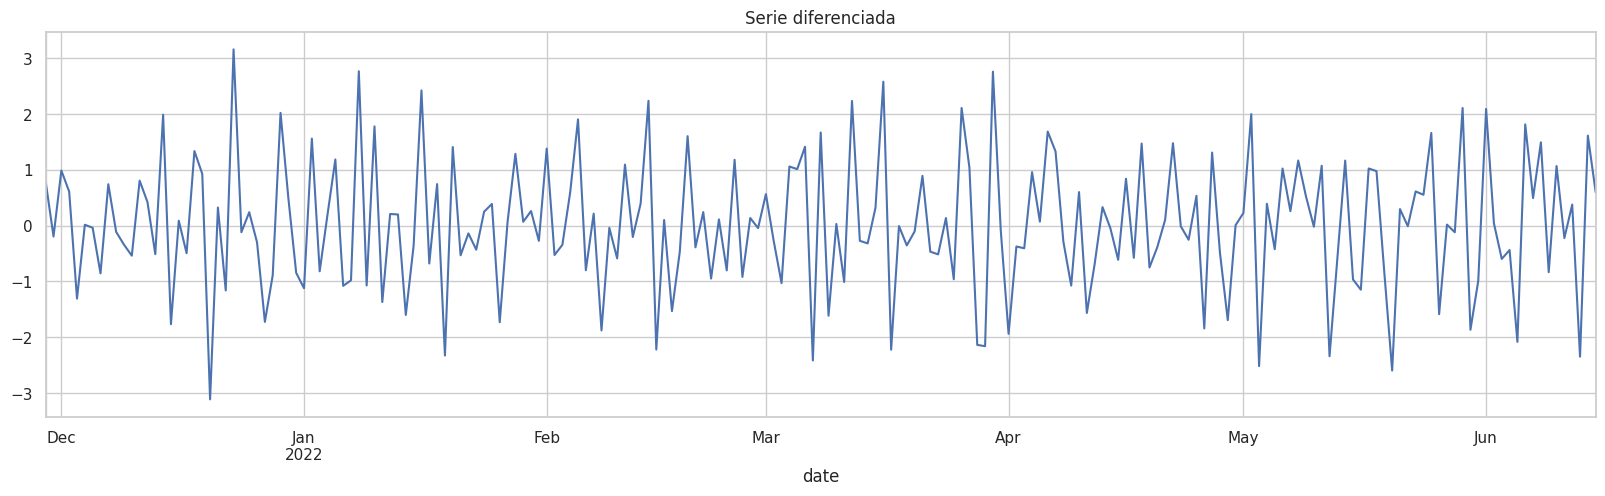

In [ ]:
data_diff.analisis.plot(figsize=(20,5), title = "Serie diferenciada")
plt.show()

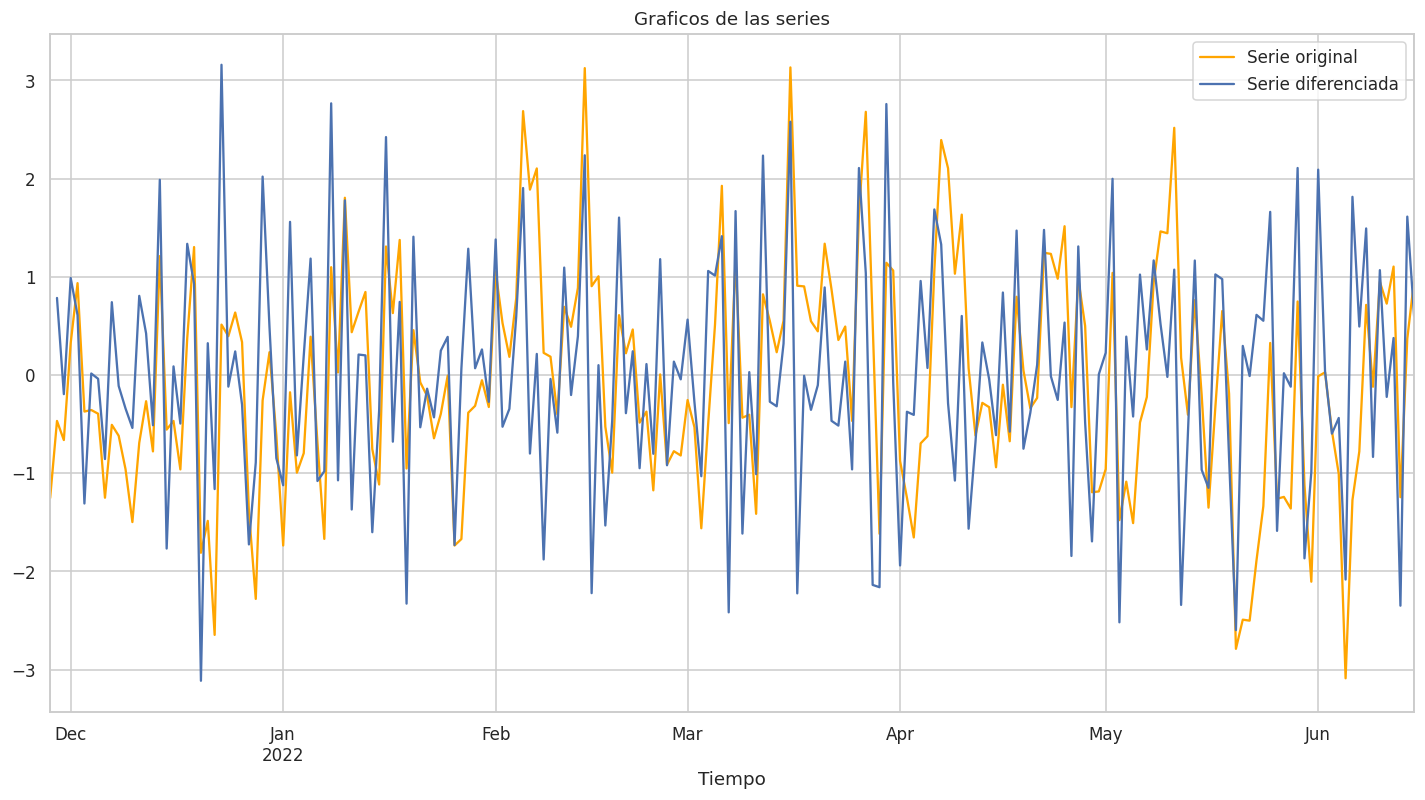

In [ ]:
plt.figure(figsize=(16, 8), dpi=110)

data['analisis'].plot(label='Serie original', color='orange')
data_diff['analisis'].plot(label='Serie diferenciada')

plt.title('Graficos de las series')

plt.xlabel('Tiempo')

plt.legend()

# Graficos serie original

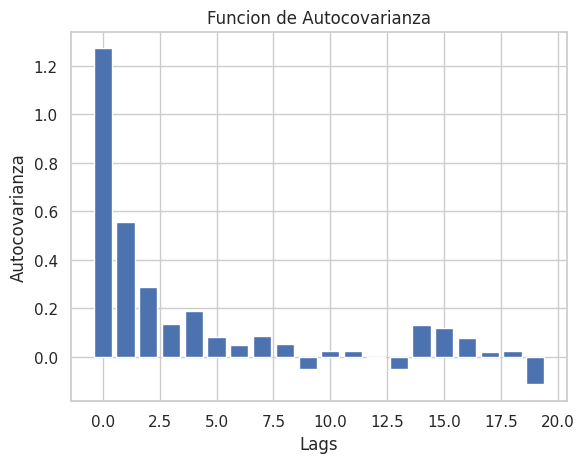

In [ ]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data.analisis

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

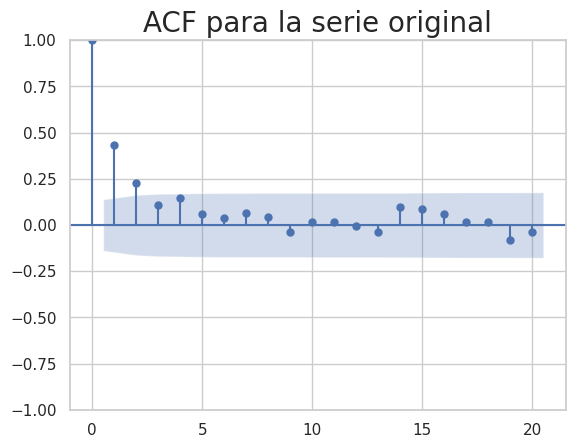

In [ ]:
sgt.plot_acf(data.analisis, zero = True, lags = 20)
plt.title("ACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 1*

Una vez mas, vemos la grafica de la funcion de autocorrelacion que muestra cómo las observaciones en una serie de datos se relacionan entre sí a medida que se desplazan en el tiempo. Ayuda a identificar patrones de repetición en los datos.La relacion en cada momento es directa e indirecta con respecto al momento 0.
Con esta grafica, podemos llegar a tener una primera aproximacion de presencia o no de estacionariedad.

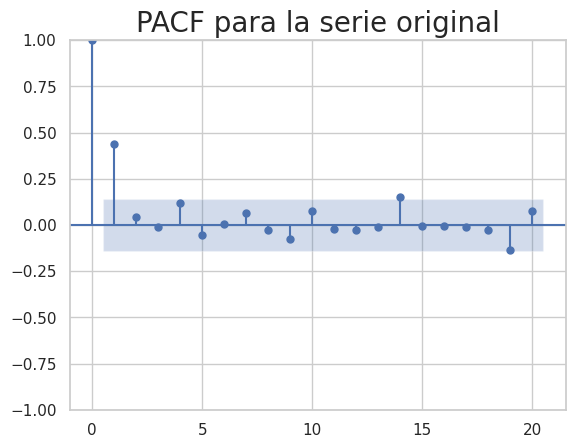

In [ ]:
sgt.plot_pacf(data.analisis, lags = 20, alpha = 0.05,  method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 2*

En este caso, la grafica es de una funcion de autocorrelacion parcial ( PACF = "Partial Autocorrelation Function ). La misma ayuda a identificar relaciones directas entre observaciones separadas en el tiempo, eliminando efectos indirectos. Cuando estamos trabajando con modelos autoregresivos, nos puede mostrar el orden del mismo.

# Graficos serie original diferenciada

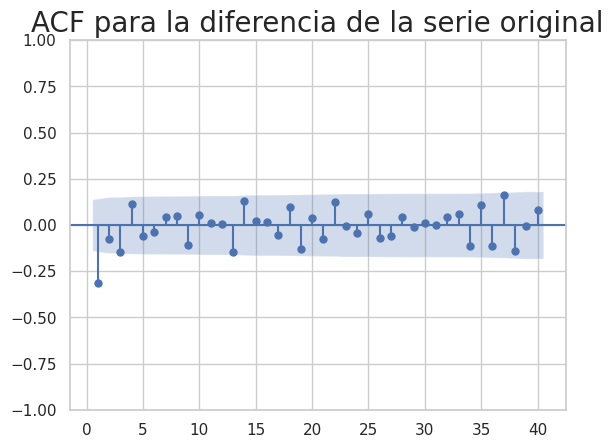

In [ ]:
sgt.plot_acf(data_diff.analisis, zero = False, lags = 40)
plt.title("ACF para la diferencia de la serie original", size = 20)
plt.show()

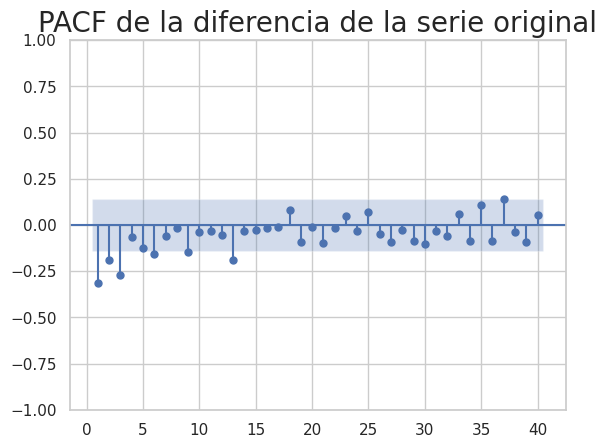

In [ ]:
sgt.plot_pacf(data_diff.analisis, lags = 40, alpha = 0.05, zero = False)
plt.title("PACF de la diferencia de la serie original", size = 20)
plt.show()

# Modelo Autorregresivo de orden 1

In [ ]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(data.analisis, order=((1),0,0))
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               analisis   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -286.752
Date:                Tue, 10 Oct 2023   AIC                            579.503
Time:                        23:10:24   BIC                            589.398
Sample:                    11-28-2021   HQIC                           583.508
                         - 06-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0571      0.128     -0.447      0.655      -0.307       0.193
ar.L1          0.4371      0.064      6.807      0.000       0.311       0.563
sigma2         1.0290      0.106      9.681      0.000       0.821       1.237
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.78   Prob(JB):                         0.66
Heteroskedasticity (H):               1.14   Skew:                             0.15
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
result.arroots

array([2.28783116])

In [ ]:
print(f"La raiz REAL del modelo condicionado a un AR(1)  es= {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

La raiz REAL del modelo condicionado a un AR(1)  es= [2.28783116] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [ ]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

Los parametros que arroja el modelo son= 
 const    -0.057070
ar.L1     0.437095
sigma2    1.028965
dtype: float64 


In [ ]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 579.5034887441093 
 -Bayesiano= 589.3984408437534 
 -Hannan-Quinn 583.507824496958


Presentacion de los residuos del modelo

In [ ]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

 La media de los residuos del modelo es=  0.0026158606007455542


In [ ]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

 La varianza de los residuos del modelo es=  1.0355286169617435


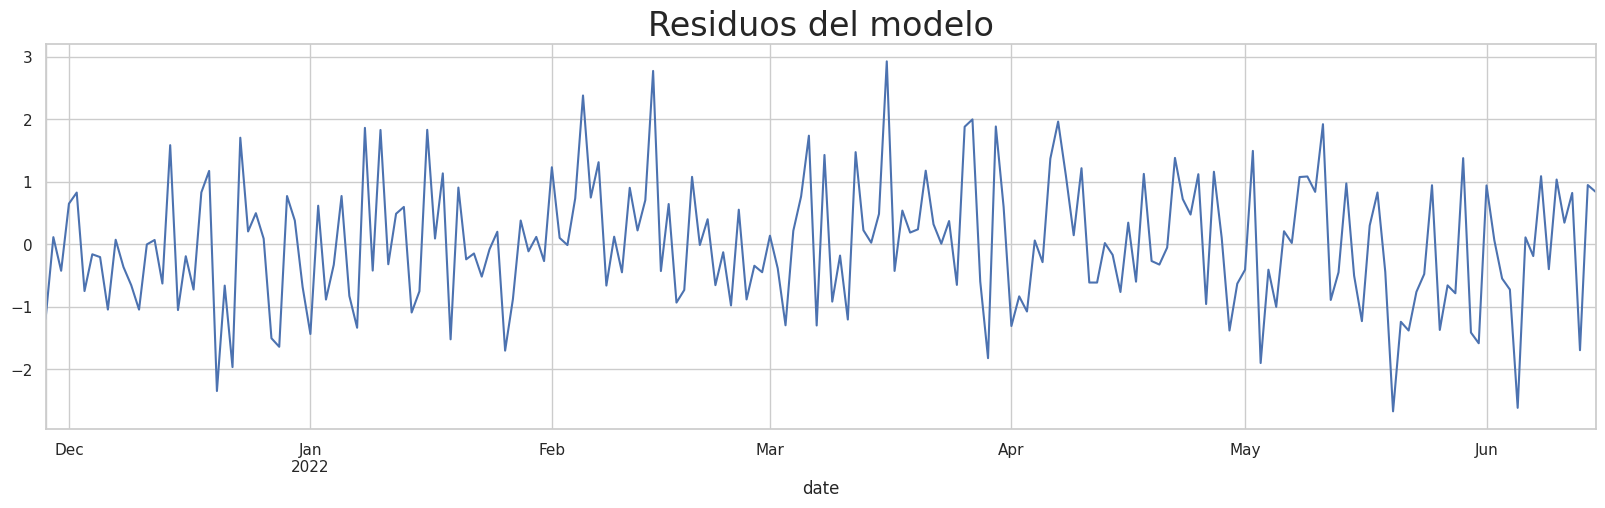

In [ ]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

*COMENTARIO NUEVO 3*

En el gráfico, se presentan los residuos del modelo. Para validar la elección adecuada del modelo, es fundamental que los resultados de estos residuos cumplan con la propiedad de "ruido blanco". Es recomendable enfatizar este concepto y aclarar cualquier pregunta o inquietud que puedan surgir al respecto. Estoy a disposición para responder cualquier consulta sin ningún problema.

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

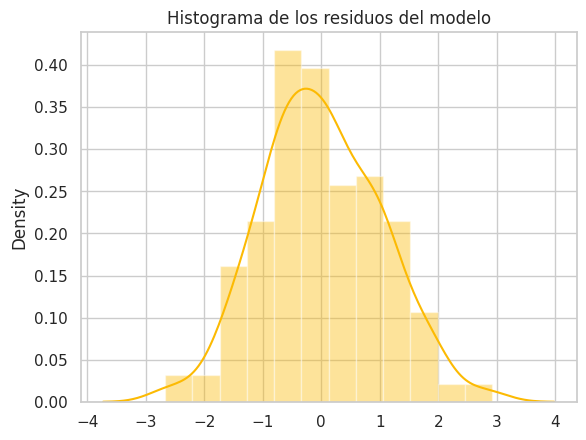

In [ ]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [ ]:
import scipy.stats
import pylab

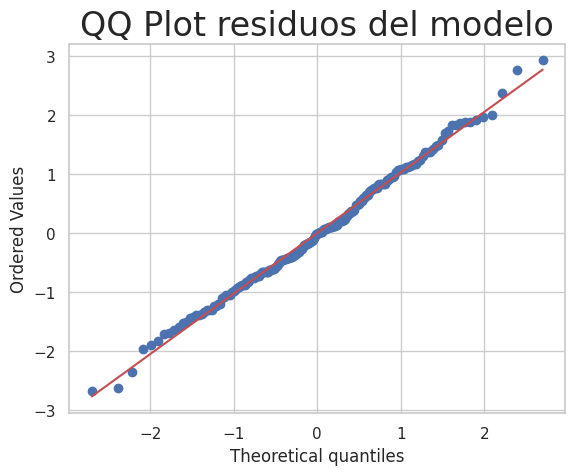

In [ ]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

*Prueba* Ljung-Box

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.080034,0.777251
2,0.434094,0.804892
3,0.897758,0.825969
4,4.085922,0.394502
5,4.096859,0.535557
6,4.114261,0.661217
7,4.659609,0.701422
8,5.120726,0.744598
9,6.622665,0.676339
10,6.875453,0.737148


Text(0, 0.5, 'P-valores ')

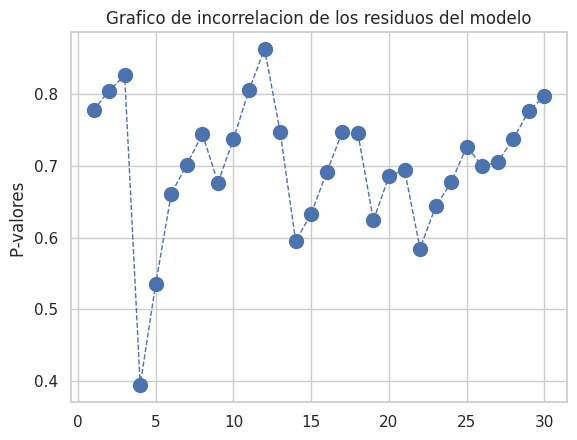

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

*COMENTARIO NUEVO 4*

Aqui vemos la grafica de incorrelacion de los residuos del modelo, los residuos tienen q estar incorrelacionados. Tienen q ser proxi al ruido blanco. Una forma de analisis es esta grafica para ver esto. En este caso, los residuos no presentan correlacion.